<a href="https://colab.research.google.com/github/drewm8080/Analyzing-COVID-19-Data-Sources/blob/main/Covidestim_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**User Input Here**

In [2]:
print('Welcome to the COVID-19 Covidestim Statistics')
print('')
print('Please tell me which state you would like to see. Type full name of state with the first letter capitalized. EX: Florida, Georgia etc.')
userinput = input('Please put state name here:')

Welcome to the COVID-19 Covidestim Statistics

Please tell me which state you would like to see. Type full name of state with the first letter capitalized. EX: Florida, Georgia etc.
Please put state name here:California


**Framework for Cases and Deaths from Covidestim**

In [3]:
# might need this cell if your data does not download directly from the URL
# !pip install fsspec
# !pip install pandas

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
# loading in the data
url = 'https://covidestim.s3.us-east-2.amazonaws.com/latest/state/estimates.csv'
df= pd.read_csv(url)

In [6]:
# setting datetime index 
df.date = pd.to_datetime(df.date)

In [7]:
# making sure the data starts after 03-01-2020
df = df[df.date >= '2020-03-01']

In [8]:
# slicing the data 
df = df.loc[:,['state','date','cases.fitted','deaths.fitted']]

In [9]:
# cleaning the data
df['Cases'] = df['cases.fitted']
df['Deaths'] = df['deaths.fitted']
df = df.drop(columns =['cases.fitted','deaths.fitted'])

In [10]:
# selecting the state
df = df[df.state == userinput]

In [11]:
# cleaning the data
df= df.reset_index(drop = True)

In [12]:
# calulating the cummulative cases
for i in range(1,len(df)):
  x = df.loc[i,'Cases'] + df.loc[i-1,'Cases']
  df.loc[i,'Cases'] = x

In [13]:
# calulating the cummulative deaths
for i in range(1,len(df)):
  x = df.loc[i,'Deaths'] + df.loc[i-1,'Deaths']
  df.loc[i,'Deaths'] = x

In [14]:
# creating day column for each date 
df['Day'] = df.groupby('state')['date'].rank(ascending=True)

In [15]:
df['Avg day of case'] = 0 # declaring new column
df['Avg day of death'] = 0

In [16]:
# setting the first day of each state to be the first date of cases 
df.loc[df.groupby('state')['date'].head(1).index, 'Avg day of case'] = df.loc[:,'Day']

In [17]:
# setting it so the avg day of death is the first day 
df = df[df.Deaths > 0]

In [18]:
# setting the first day as the first row in Avg day of death

df.loc[df.groupby('state')['date'].head(1).index, 'Avg day of death'] = df.loc[:,'Day']

In [19]:
# creating the CDF Column
df['cdf_cases'] = df['Cases']

In [20]:
# creating the cdf column
df['cdf_deaths'] = df['Deaths']

In [21]:
# creating the formula for the CDF column
df.loc[:,'cdf_cases':] = df.loc[:,'cdf_cases':].div(df.iloc[-1]['cdf_cases':])
df = df.reset_index()

In [22]:
# creating the formula for the CDF column
df['cdf_deaths'] = df.loc[:,'cdf_deaths':].div(df.iloc[-1]['cdf_deaths':])

In [23]:
# calulating Avgerage day of case
for i in range(1, len(df)):
  x = (((df.loc[i, 'Cases'] - df.loc[i-1, 'Cases']) * (df.loc[i, 'Day']- df.loc[i-1, 'Avg day of case'])) / (df.loc[i, 'Cases'])) + (df.loc[i-1, 'Avg day of case'])
  df.loc[i, 'Avg day of case'] = round(x, 2)

In [24]:
# calulating Avgerage day of death
for i in range(1, len(df)):
  x = (((df.loc[i, 'Deaths'] - df.loc[i-1, 'Deaths']) * (df.loc[i, 'Day']- df.loc[i-1, 'Avg day of death'])) / (df.loc[i, 'Deaths'])) + (df.loc[i-1, 'Avg day of death'])
  df.loc[i, 'Avg day of death'] = round(x, 2)

In [25]:
# subtracting the avg death day and avg case day
df['Avg Death Day - Avg Case Day'] = df['Avg day of death'] - df['Avg day of case'] 

In [26]:
# avg case day/ current day
df['Avg Day of Case/ Current Day'] = df['Avg day of case'] / df['Day']

In [27]:
# avg death day/ current day
df['Avg Day of Death/ Current Day'] = df['Avg day of death'] / df['Day']

In [28]:
# cleaning data
df = df.drop(columns = 'index')

In [29]:
df

,state,date,Cases,Deaths,Day,Avg day of case,Avg day of death,cdf_cases,cdf_deaths,Avg Death Day - Avg Case Day,Avg Day of Case/ Current Day,Avg Day of Death/ Current Day
0,California,2020-03-01,1.010438e+00,0.005661,1.0,1.00,1.00,2.76238e-07,9.47663e-08,0.00,1.000000,1.000000
1,California,2020-03-02,2.435749e+00,0.014061,2.0,1.59,1.60,6.65895e-07,2.35382e-07,0.01,0.795000,0.800000
2,California,2020-03-03,4.428309e+00,0.026484,3.0,2.22,2.26,1.21063e-06,4.43334e-07,0.04,0.740000,0.753333
3,California,2020-03-04,7.226081e+00,0.044691,4.0,2.91,2.97,1.9755e-06,7.48117e-07,0.06,0.727500,0.742500
4,California,2020-03-05,1.111931e+01,0.071178,5.0,3.64,3.73,3.03984e-06,1.1915e-06,0.09,0.728000,0.746000
...,...,...,...,...,...,...,...,...,...,...,...,...
395,California,2021-03-31,3.648908e+06,59318.373361,396.0,267.16,276.22,0.997554,0.99298,9.06,0.674646,0.697525
396,California,2021-04-01,3.651232e+06,59432.112946,397.0,267.24,276.45,0.998189,0.994884,9.21,0.673149,0.696348
397,California,2021-04-02,3.653505e+06,59539.899098,398.0,267.32,276.67,0.99881,0.996689,9.35,0.671658,0.695151
398,California,2021-04-03,3.655711e+06,59641.855044,399.0,267.40,276.88,0.999413,0.998395,9.48,0.670175,0.693935


**Statistics**

In [30]:
# framework for statistics
averagedayofcase = df['Avg day of case'].iloc[-1]
averagedayofdeath = df['Avg day of death'].iloc[-1]
differDeaths = df['Avg Death Day - Avg Case Day'].max()
differCases= -df['Avg Death Day - Avg Case Day'].min()

In [31]:
print('COVID-19 STATISTICS')
print('')
print('State = ', df.state.iloc[-1])
print('Average Day of Death and Average Day of Case as of',df['date'].iloc[-1])
print('Case =', averagedayofcase)
print('Death = ', averagedayofdeath)
print('Days When Average Dates of Death Differ By Largest Amounts')
print('Death Day – Case Day =', differDeaths)
print('Case Day - Death Day =',differCases)

COVID-19 STATISTICS

State =  California
Average Day of Death and Average Day of Case as of 2021-04-04 00:00:00
Case = 267.48
Death =  277.08
Days When Average Dates of Death Differ By Largest Amounts
Death Day – Case Day = 9.599999999999966
Case Day - Death Day = 40.97999999999999


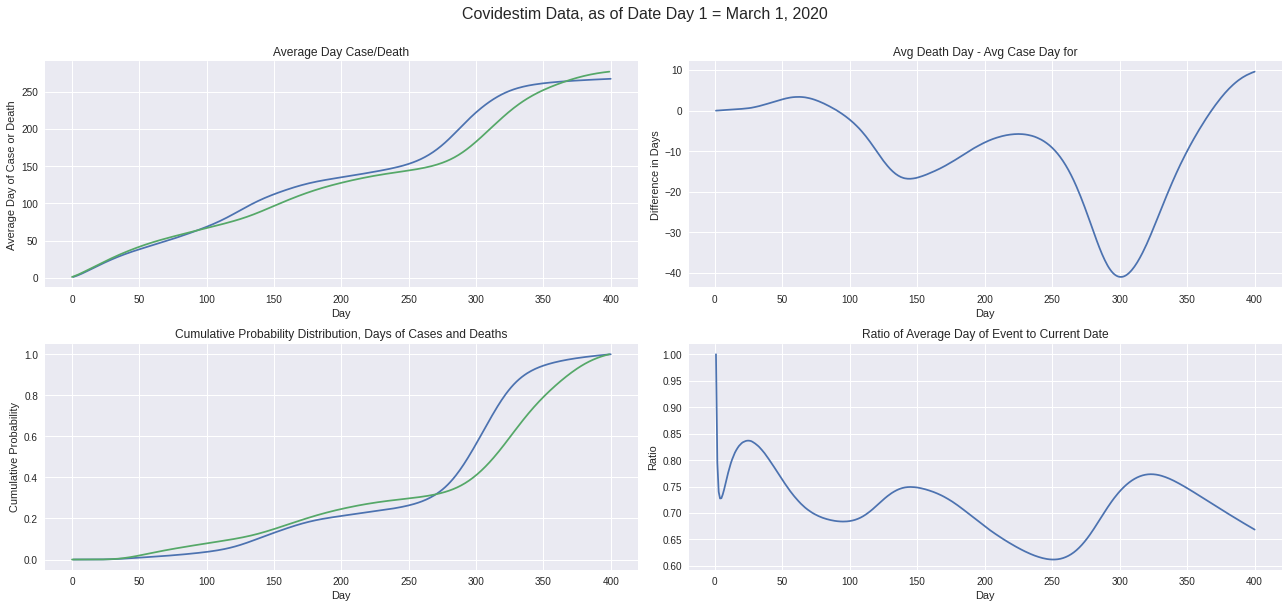

In [33]:
plt.figure(figsize = (18,8))

plt.subplot(2,2,1)
plt.plot(df['Day'], df['Avg day of case'],df['Avg day of death'])
plt.title('Average Day Case/Death')
plt.xlabel('Day')
plt.ylabel('Average Day of Case or Death')

plt.subplot(2,2,2)
plt.plot(df['Day'], df['Avg Death Day - Avg Case Day'])
plt.title('Avg Death Day - Avg Case Day for')
plt.xlabel('Day')
plt.ylabel('Difference in Days')

plt.subplot(2,2,3)
plt.plot(df['Day'],df['cdf_cases'],df['cdf_deaths'])
plt.title('Cumulative Probability Distribution, Days of Cases and Deaths')
plt.xlabel('Day')
plt.ylabel('Cumulative Probability')

plt.subplot(2,2,4)
plt.plot(df['Day'], df['Avg Day of Case/ Current Day'])
plt.title('Ratio of Average Day of Event to Current Date')
plt.xlabel('Day')
plt.ylabel('Ratio')



plt.suptitle('Covidestim Data, as of Date Day 1 = March 1, 2020', size= 16,y=1.05)
plt.tight_layout()

plt.style.use('seaborn')